# **<span style="color: #ffd33d">   ★ BIKE SHARING DEMAND 분석 역량 강화 프로젝트 ★</span>**
<br>
<hr/>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno

import warnings


* 경고를 무시해주는 옵션

In [2]:
warnings.filterwarnings(action='ignore')


* 그래프를 자연스럽게 출력해주는 옵션

In [3]:
%matplotlib inline

* 파일 경로 설정

In [4]:
TRAIN_FILE_PATH = 'data/train.csv'
df = pd.read_csv(TRAIN_FILE_PATH, parse_dates=['datetime'])

* 데이터 프레임 타입 체크

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


#### 결측치 확인
 * 결측치 없음



In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### 결측치 유무 여부 시각화
* 결측치 없음

<AxesSubplot:>

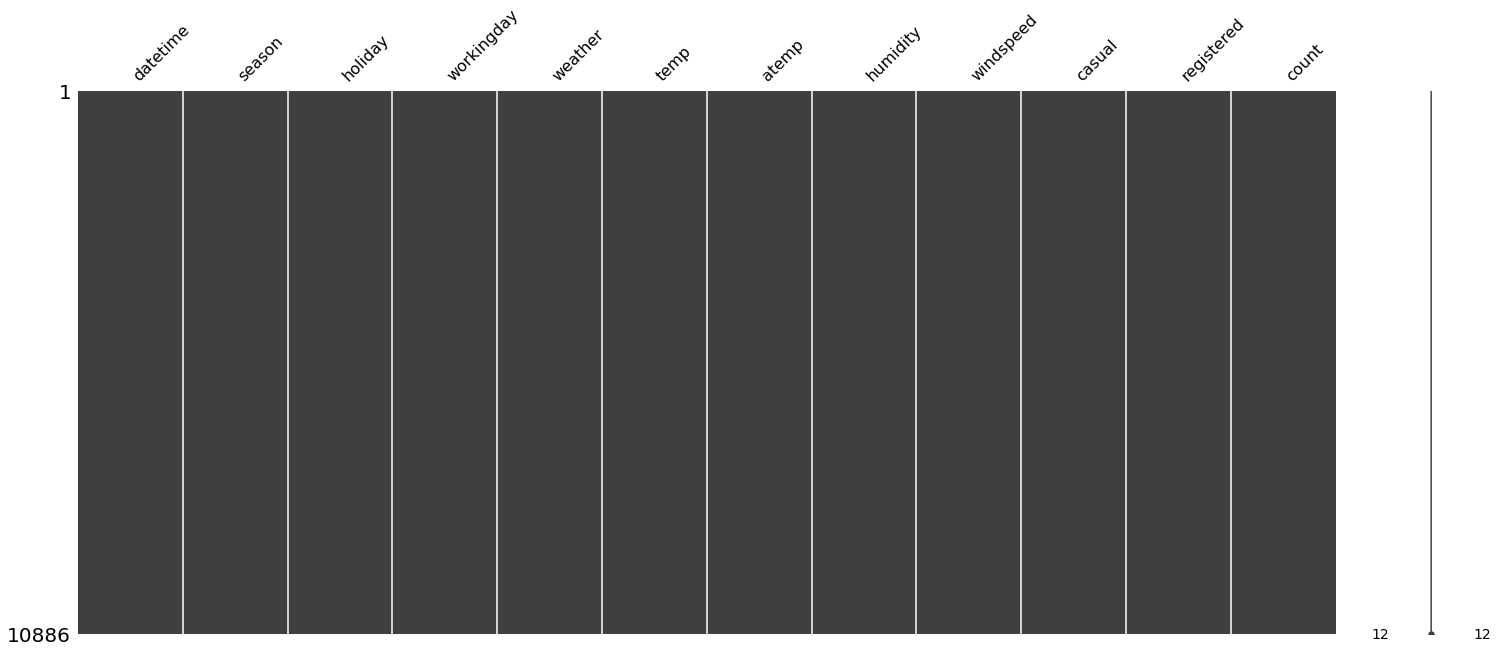

In [7]:
msno.matrix(df=df)

* 요일 데이터 세분화

In [8]:

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

### **시간 데이터 막대 그래프**

1. **분석목적**
    * 시간 데이터에 따른 대여량이 어떤 관계를 가지고 있는지 궁금하기 때문에 제일 먼저 시각화 하였음.

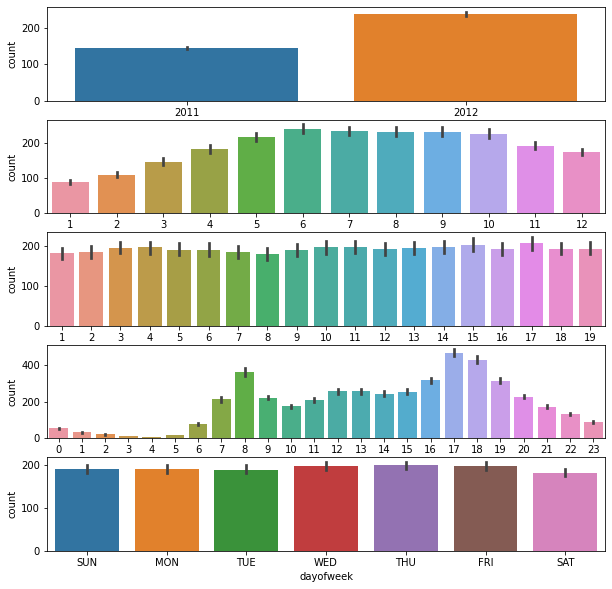

In [9]:
f, ax = plt.subplots(nrows=5, figsize=(10,10))
sns.barplot(data=df, x='year', y='count', ax=ax[0])
sns.barplot(data=df, x='month', y='count', ax=ax[1])
sns.barplot(data=df, x='day', y='count', ax=ax[2])
sns.barplot(data=df, x='hour', y='count', ax=ax[3])
sns.barplot(data=df, x='dayofweek', y='count', ax=ax[4])
ax[4].set_xticklabels(['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'])
plt.show()

2. **분석결과**
    * 2011년보다 2012년에 대여량이 증가하였음. (2011년보다 2012년에 홍보가 더 되었거나 단골 손님 유지 등의 이유가 있다고 생각함.)
    <br><br>
    * 추운 봄 겨울 보다는 따뜻한 여름 가을에 대여량이 더 많음.(워싱턴 DC의 날씨 정보 확인 결과, 11, 12, 1, 2, 3월이 추운 날씨)
    <br><br>
    * 출/퇴근 시간인 8시, 17~18시에 대여량이 가장 많았음.
    <br><br>
    * 일간 데이터는 거의 모든 날짜에 균일한 분포를 보였고 19일까지 밖에 데이터가 없기 때문에 <span style='color: RED'>**일간 데이터는 예측에 효과적인 데이터가 아님을 판단하고 삭제 결정**</span>
    <br><br>
    * 주간 데이터도 일간 데이터와 거의 균일한 모습을 보이고 있어 <span style='color: RED'>**유용한 데이터가 아님을 판단하고 삭제**</span>

In [10]:
df.drop(['day', 'dayofweek'], axis=1, inplace=True)

### **계절, 명절, 평일/주말에 시간 별 대여량 그래프**

1. **분석목적**
    * 각 특징 별 시간의 흐름에 따른 자전거 대여량 수의 차이가 궁금하여 포인트 플롯을 사용하여 시각화 하였음.

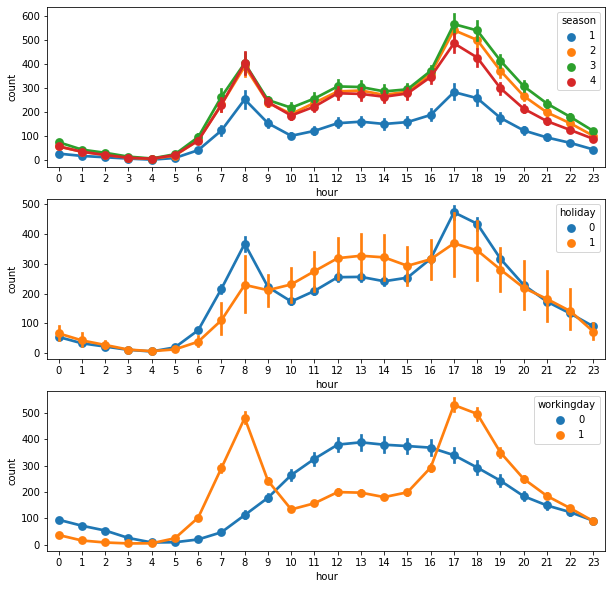

In [11]:
f, ax = plt.subplots(nrows=3, figsize=(10,10))
sns.pointplot(data=df, y='count', x='hour', hue='season', ax=ax[0])
sns.pointplot(data=df, y='count', x='hour', hue='holiday', ax=ax[1])
sns.pointplot(data=df, y='count', x='hour', hue='workingday', ax=ax[2])
plt.show()

2. **분석결과**
    * 계절별 데이터 확인 결과 봄의 대여량이 가장 적고 여름, 가을, 겨울의 대여량은 큰 차이는 없지만 겨울이 제일 적었음.
    <br><br>
    * 공휴일과 평일 주말 데이터의 분포는 거의 비슷하지만 공휴일 데이터에서 출퇴근 시간에 약간 대여량이 늘어나는 모습을 보여 공휴일에 출퇴근하는 사람이 있거나 쉬는 공휴일과 노는 공휴일이 나누어져 있지 않다고 생각함.
    <br><br>
    * 주말과 공휴일은 비슷하나 약간의 다른 분포를 보이므로 공휴일 'workingday' 컬럼에 숫자 값 2로 저장한 뒤 <span style = 'color : RED'>**One-Hot-Encoding을 사용하여 분류**</span>하는 방법을 사용하기로 결정.

In [12]:
holi_index = list(df[df['holiday']==1].index)

for i in range(len(holi_index)):
    df.loc[holi_index[i], 'workingday'] = 2

df.drop('holiday', axis=1, inplace=True)

df[df['workingday']==2]

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
372,2011-01-17 00:00:00,1,2,2,8.20,9.850,47,15.0013,1,16,17,2011,1,0
373,2011-01-17 01:00:00,1,2,2,8.20,9.850,44,12.9980,1,15,16,2011,1,1
374,2011-01-17 02:00:00,1,2,2,7.38,8.335,43,16.9979,0,8,8,2011,1,2
375,2011-01-17 03:00:00,1,2,2,7.38,9.090,43,12.9980,0,2,2,2011,1,3
376,2011-01-17 04:00:00,1,2,2,7.38,9.850,43,8.9981,1,2,3,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,2012-11-12 19:00:00,4,2,1,22.14,25.760,73,19.0012,30,323,353,2012,11,19
10258,2012-11-12 20:00:00,4,2,2,21.32,25.000,77,19.0012,31,273,304,2012,11,20
10259,2012-11-12 21:00:00,4,2,3,22.14,25.760,73,15.0013,10,145,155,2012,11,21
10260,2012-11-12 22:00:00,4,2,1,21.32,25.000,77,16.9979,12,100,112,2012,11,22


* 공휴일 데이터를 'workingday' 컬럼에 2로 저장후 'holiday' 컬럼은 삭제

<br><br>
<hr/>

### **상관계수 확인을 위한 히트맵 그래프**
1. **분석목적**
    * 각 변수 별 상관 계수를 확인하고 다중 공선성이 의심되는 변수를 확인하기 위해 히트맵 그래프를 그렸음.

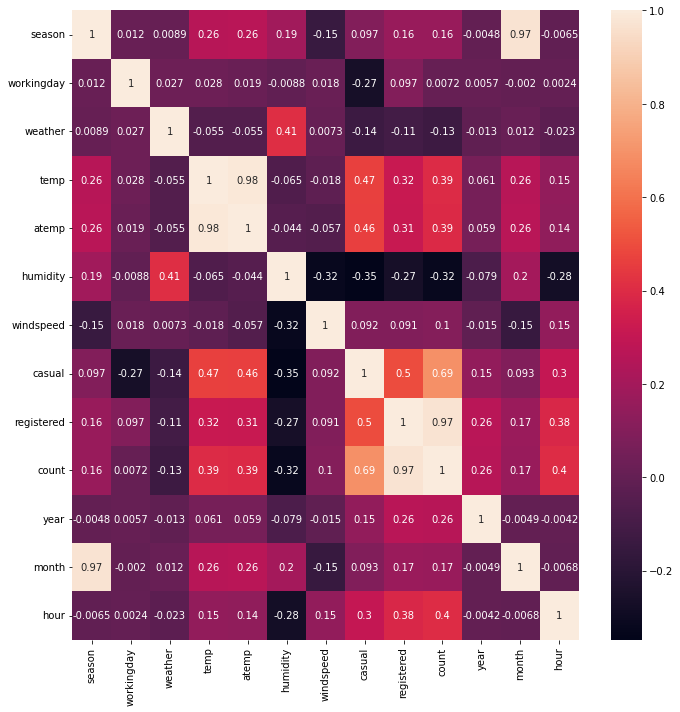

In [13]:
f = plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)
plt.tight_layout()
plt.show()

2. **분석결과**
    * temp와 atemp / registered 와 count / season 과 month 가 높은 상관 관계를 보임 (다중공선성으로 의심)
    <br><br>
    * registered 와 count는 타겟 변수(y) 이므로 제외
    <br><br>
    * VIF는 보통 10을 기준으로 다중공선성을 판단함
    <br><br>
    * 10이 넘기 때문에 <span style="color: RED">**다중공선성**</span>으로 판단

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_col = ['season', 'temp', 'atemp', 'month']

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df[X_col], i) for i in range(df[X_col].shape[1])]
vif['feateres'] = df[X_col].columns
vif

,VIF Factor,feateres
0,86.558560,season
1,244.435192,temp
2,259.819625,atemp
3,71.657048,month


### **해결방법**
 1. 정규화
 2. 해당 특징 삭제
<br><br>
 <hr/>

#### **정규화**
* sklearn의 **MinMaxscaler**는 데이터 프레임 형식이 아닌 <br>numpy 배열 형식을 반환하기 때문에 **MinMaxscaler**를 함수로 구현
* 공식
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;![minmaxscale](png/minmax.PNG)

In [16]:
def MMscaler(df, columnsList):
    mms_df = df.copy()
    for name in columnsList:
        max = df[name].max()
        min = df[name].min()
        for i in range(df.shape[0]):
            mms_df.loc[i, name] = (df.loc[i, name] - min) / (max - min)

    return mms_df

* 해결방법 1을 진행 (정규화)
* season과 month는 범주형 데이터이기 때문에 정규화 대상에서 제외함.
<br><br>
* **정규화 후 VIF**

In [17]:
multicol = ['temp', 'atemp']
df_n = MMscaler(df, multicol)

vif_n = pd.DataFrame()
vif_n['VIF Factor'] = [variance_inflation_factor(df_n[X_col], i) for i in range(df_n[X_col].shape[1])]
vif_n['feateres'] = df_n[X_col].columns
vif_n

,VIF Factor,feateres
0,86.062461,season
1,224.015624,temp
2,240.300949,atemp
3,71.498267,month


* VIF는 줄어들진 않았지만 시각화로 다중공선성을 다시 판단하기 위해 산점도 행렬을 시각화함.
<br><br>
* 선형 관계를 명확히 확인할 수 있으므로 다중공선성으로 판정.
* <span style='color: YELLOW'>정규화는 다중공선성 문제를 해결할 수 없었음.</span>

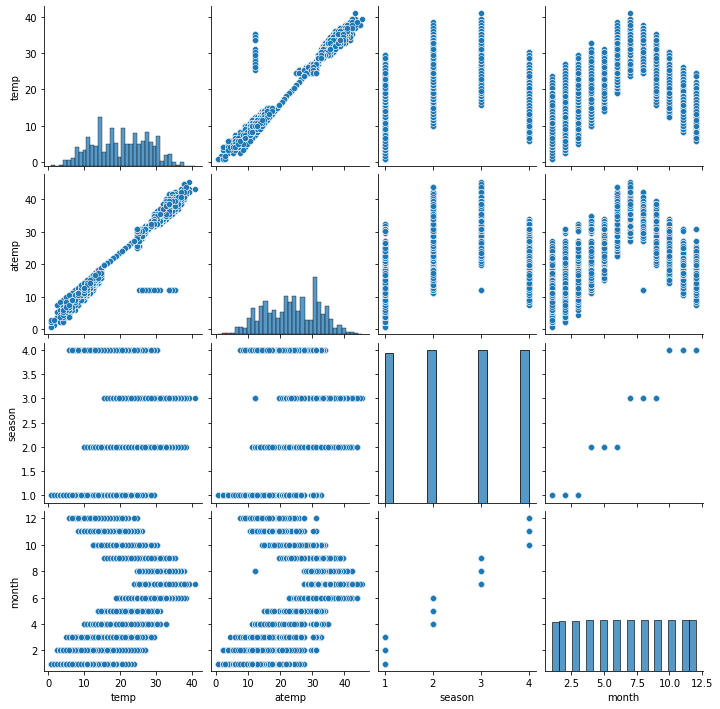

In [18]:
sns.pairplot(df[['temp', 'atemp', 'season', 'month']], diag_kind='hist')

#### 특징 삭제
* 정규화로 다중공선성 문제를 해결할 수 없었으므로 해당 특징 삭제를 결정
<br><br>
* <span style = 'color: RED'>**VIF가 더 높았던 'atemp'와 'season'을 삭제**</span>

In [19]:
df_n.drop(['atemp', 'season'], axis=1, inplace=True)

<hr/>

### 독립변수 중 양적변수의 산점도 그래프 확인
<br>